In [261]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# initial dataframe
df = pd.read_csv('startup_funding.csv')

2015 936
2016 993
2017 443


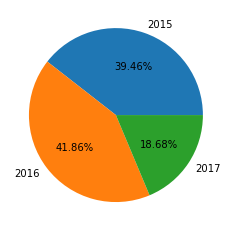

In [56]:
# Q1) Year Vs No of Funding in each year
date = df['Date'].str.replace(".","/")
date = date.str.replace("//","/")
date = date.str.split("/",expand=True)
years = date[2]
year_group = years.value_counts().sort_index()
year_list,count_list=[],[]
for i in year_group.index:
    print(i,year_group[i])
    year_list.append(i)
    count_list.append(year_group[i])
# print(year_list)
# print(count_list)
plt.pie(count_list,labels=year_list,autopct="%.2f%%")
plt.show()

In [86]:
# Q2) City vs No of Number of Startups
city = df['CityLocation'].str.title().replace('Delhi','New Delhi')
city = city.str.split('/',expand=True)[0]
city = city.str.strip()
city_group = city.value_counts()[:10]
cities = city_group.index
values = city_group.values
# print(city_group)
for i in range(len(cities)):
    print(cities[i],values[i])
# print(cities)
# print(values)


Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


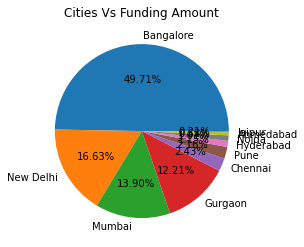

In [202]:
# Q3) Role of cities in Funding amount
df['CityLocation'].replace('Delhi','New Delhi',inplace=True)
df1 = df[df['CityLocation'].isnull()==False]
df1 = df1[df1['AmountInUSD'].isnull()==False]
amount = df1['AmountInUSD'].str.replace(',','').astype(str).astype(int)
indian_city = df1['CityLocation'].str.split('/',expand=True)[0]
indian_city = indian_city.str.strip()
df1['Amount'] = amount
df1['IndianCity'] = indian_city
# print(df1)
df2 = df1.groupby('IndianCity').sum().reset_index()
df2 = df2.sort_values('Amount',ascending=False)[:10]
cities = df2['IndianCity'].values
values = df2['Amount'].values
sum1 = sum(values)
for i in range(10):
    print(cities[i],end=" ")
    print("%.2f"%(values[i]*100/sum1))
plt.pie(values,labels=cities,autopct="%.2f%%")
plt.title("Cities Vs Funding Amount")
plt.show()

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


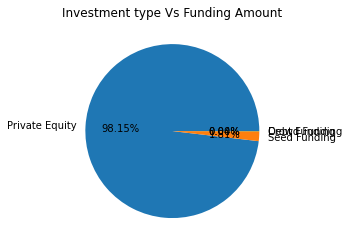

In [226]:
# Q4) Investment type vs Percentage
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df1 = df[df['InvestmentType'].isnull()==False]
df1 = df1[df1['AmountInUSD'].isnull()==False]
amount = df1['AmountInUSD'].str.replace(',','').astype(str).astype(int)
df1['Amount'] = amount
df2 = df1.groupby('InvestmentType').sum().reset_index()
df2 = df2.sort_values('Amount',ascending=False)
invest_type_list = df2['InvestmentType'].values
values = df2['Amount'].values
sum1 = sum(values)
for i in range(4):
    print(invest_type_list[i],end=" ")
    print("%.2f"%(values[i]*100/sum1))
plt.pie(values,labels=invest_type_list,autopct="%.2f%%")
plt.title("Investment type Vs Funding Amount")
plt.show()

Seed Funding 54.87
Private Equity 45.00
Crowd Funding 0.08
Debt Funding 0.04


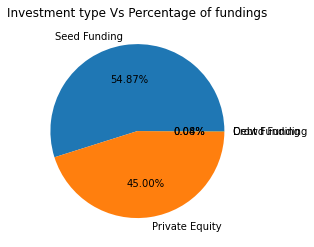

In [214]:
invest_type = df['InvestmentType'].str.replace('PrivateEquity','Private Equity')
invest_type = invest_type.str.replace('SeedFunding','Seed Funding')
invest_type = invest_type.str.replace('Crowd funding','Crowd Funding')
invest_type = invest_type[invest_type.isnull()==False]
invest_type_group = invest_type.value_counts()
invest_type_list = invest_type_group.index
invest_type_count_list = invest_type_group.values
sum1 = sum(invest_type_count_list)
for i in invest_type_list:
    print(i,end=" ")
    print("%.2f"%(invest_type_group[i]*100/sum1))
plt.pie(invest_type_count_list,labels=invest_type_list,autopct="%.2f%%")
plt.title("Investment type Vs Percentage of fundings")
plt.show()

ECommerce 40.51
Consumer Internet 35.96
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


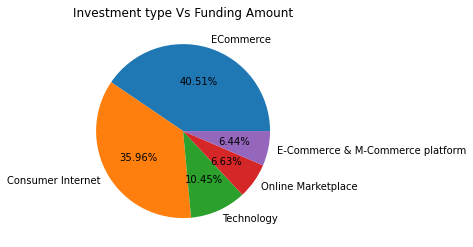

In [234]:
# Q5) Type of Industry Vs Funding Amount
df['IndustryVertical'].replace('eCommerce','ECommerce',inplace=True)
df1 = df.copy()
df1 = df1[df1['AmountInUSD'].isnull()==False]
amount = df1['AmountInUSD'].str.replace(',','').astype(str).astype(int)
df1['Amount'] = amount
df2 = df1.groupby('IndustryVertical').sum().reset_index()
df2 = df2.sort_values('Amount',ascending=False)[:5]
industry_list = df2['IndustryVertical'].values
values = df2['Amount'].values
sum1 = sum(values)
for i in range(5):
    print(industry_list[i],end=" ")
    print("%.2f"%(values[i]*100/sum1))
plt.pie(values,labels=industry_list,autopct="%.2f%%")
plt.title("Industry type Vs Funding Amount")
plt.show()

In [ ]:
# Q6) Industry Vs funding amount
df['StartupName'] = df['StartupName'].apply(lambda x: 'Flipkart' if 'Flipkart' in x else x)
df['StartupName'] = df['StartupName'].apply(lambda x: 'Paytm' if 'Paytm' in x else x)
df['StartupName'] = df['StartupName'].apply(lambda x: 'Ola' if 'Ola' in x else x)
df['StartupName'] = df['StartupName'].apply(lambda x: 'Oyo' if 'Oyo' in x else x)
df1 = df.copy()
df1 = df1[df1['AmountInUSD'].isnull()==False]
amount = df1['AmountInUSD'].str.replace(',','').astype(str).astype(int)
df1['Amount'] = amount
df2 = df1.groupby('StartupName').sum().reset_index()
df2 = df2.sort_values('Amount',ascending=False)[:5]
industry_list = df2['StartupName'].values
values = df2['Amount'].values
# sum1 = sum(values)
for i in range(5):
    print(industry_list[i])
#     print("%.2f"%(values[i]*100/sum1))
plt.pie(values,labels=industry_list,autopct="%.2f%%")
plt.title("Industry type Vs Funding Amount")
plt.show()

In [259]:
# Q7) Startup Vs No of times funded
df.StartupName[df.StartupName=='Ola Cabs']='Ola'
df.StartupName[df.StartupName=='Olacabs']='Ola'
df.StartupName[df.StartupName=='Flipkart.com']='Flipkart'
df.StartupName[df.StartupName=='Oyo Rooms']='Oyo'
# df.StartupName[df.StartupName=='OYOfit']='Oyo'
df.StartupName[df.StartupName=='Oyorooms']='Oyo'
df.StartupName[df.StartupName=='OyoRooms']='Oyo'
df.StartupName[df.StartupName=='OYO Rooms']='Oyo'
df.StartupName[df.StartupName=='Paytm Marketplace']='Paytm'
industry = df['StartupName']
ind_group = industry.value_counts()[:5]
for i in ind_group.index:
    print(i,ind_group[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Medinfi 5
Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Medinfi 5


In [302]:
# Q8) Investor who invested highest number of times
investor_name = df['InvestorsName']
inv_group = investor_name[((investor_name!='Undisclosed Investors') & (investor_name!='Undisclosed investors'))]
inv_group = inv_group[inv_group.isnull()==False]
inv_group = inv_group.str.strip()
inv_group = inv_group.str.split(',')
dict={}
for i in inv_group:
    for j in i:
        val=j.strip()
        dict[val]=dict.get(val,0)+1
sorteddict = sorted(dict.items(),key = lambda x: -x[1])
print(sorteddict[0][0],sorteddict[0][1])

Sequoia Capital 64
